# RandomForest 및 Bagging 설명
※ 앙상블(ensemble)은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

> - Ensemble기법 중 하나로 여러 개의 Decision tree model로 이뤄져 있으며, bagging 기반의 모델 
> - bagging 기반 모델의 일반화 성능이 좋게 나오기 위해서는 각각의 약분류기(weak classifier)의 성능은 좋고, 성격이 달라야함
> - 랜덤포레스트는 각각의 부트스트랩을 생성할 때, feature에 대해서도 random selection하는 것이 특징
> - 의사결정 나무와 비교해 이상치와 잡음(Outlier and noise)에 대해 상대적으로 강하며, tree의 수가 많아져도 과적합(overfitting) 문제에 덜 민감함


# 1. Classification

## 1.1 Make dataset

In [25]:
# Basic tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data split
from sklearn.model_selection import train_test_split  

(200, 2)


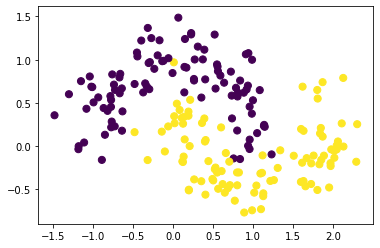

In [26]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.2, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y, s=50)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# class 확인
y

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

## 1.2 Modeling

In [28]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators : tree(weak classifier들의 수)
# oob_score : 부트스트랩 시에 추출되지 않은 data로 acc 측정
# criterion : 분기 기준 (gini, entropy)


rfc_cl = RandomForestClassifier(n_estimators=20, oob_score=True, \
                            criterion='gini', max_depth=5, random_state=42)
rfc_cl.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=42)

In [29]:
print(rfc_cl.score(X_test,y_test))

0.95


In [30]:
print(rfc_cl.oob_score_)

0.9375


- Random forest 모델은 대표적인 Black box모델로써 시각화는 어려움

## 1.3 feature importance

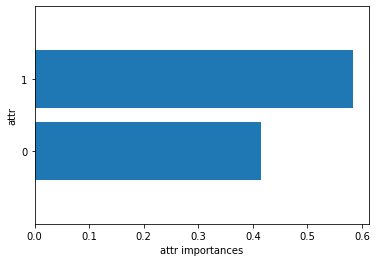

In [31]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것

def plot_feature_importances(model):

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features))

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plot_feature_importances(rfc_cl)
plt.show()

- 1번 feature가 2번 feature 보다 date의 class를 나누는데 더 중요하게 작용함을 알 수 있음

## 1.4 Effect of number of tree

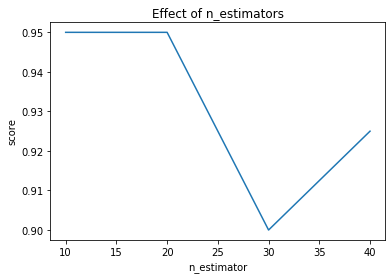

In [34]:
# random forest에 속한 decision tree별 성능변화
estimators = np.arange(10, 50, 10)
scores = []
for n in estimators:
    rfc_cl.set_params(n_estimators=n)
    rfc_cl.fit(X_train, y_train)
    scores.append(rfc_cl.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# tree 개수가 약 20개 일때 가장 좋은 성능을 보이는 것을 알 수 있다.

# 2. Regression

## 2.1 Make Dataset

In [39]:
from sklearn.datasets import load_boston as boston
bos = boston()
X = bos['data']
y = bos['target']
col_names = bos.feature_names

boston_x = pd.DataFrame(data=X, columns= col_names)
boston_x['MEDV'] = y
y = boston_x.MEDV.copy()
del boston_x['MEDV']
boston = pd.concat((boston_x,y), axis=1)

In [40]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2.2 Data scaling

> 데이터 스케일링을 해주는 이유는 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해버릴 수 있기 때문

* 장점: 다차원의 값들을 비교 및 분석하기 쉬움 , 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상
* 단점: 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없음.

In [42]:
# Feature Scaling # 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(X_train)

# test data는 transform으로 스케일링
X_test = sc.transform(X_test)

In [43]:
np.set_printoptions(suppress=True, precision=True)
X_train

array([[-0.4, -0.5, -0.7, ..., -0.5,  0.4, -0.4],
       [-0.4, -0.5, -0. , ...,  0.3,  0.2, -0.4],
       [-0.4,  0.8, -0.9, ..., -0.8,  0.4, -0.2],
       ...,
       [-0.4, -0.5, -0.2, ..., -0.3,  0.4, -0.3],
       [-0.4, -0.5, -0.6, ..., -0.3,  0.4,  0.8],
       [-0.4, -0.5, -1. , ..., -0.8,  0.4,  0.3]])

## 2.3 Modeling

In [44]:
# random forest #
from sklearn.ensemble import RandomForestRegressor

rfr_reg= RandomForestRegressor(n_estimators=80, oob_score=True, max_features=7, \
                                  criterion='mse', max_depth=5, random_state=42)
rfr_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=7, n_estimators=80,
                      oob_score=True, random_state=42)

In [45]:
# randomforest mse 기준
print(rfr_reg.score(X_test,y_test))

0.723571638856181


In [46]:
# out of bag score mse 기준
rfr_reg.oob_score_

0.8789615948475198

## 2.4 feature importance

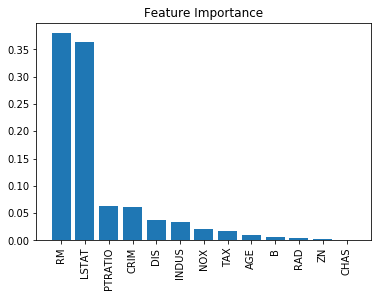

In [47]:
# feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
## randomforest 기준 
def plot_feature_importances(model):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [bos.feature_names[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(rfr_reg)
plt.show()

# 주택가격(MEDV)에 RM(주택 1가구 당 평균 방의 개수)과 LSTAT(모집단의 하위계층의 비율(%))이 
# 가장 영향을 많이 미치고 있는 것을 알 수 있다.

## 2.5 Effect of number of tree

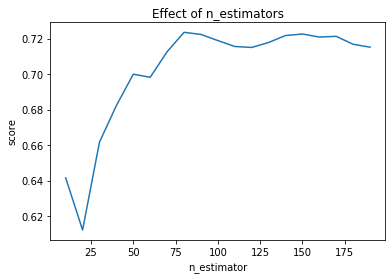

In [49]:
# random forest에 속한 decision tree별 성능변화
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rfr_reg.set_params(n_estimators=n)
    rfr_reg.fit(X_train, y_train)
    scores.append(rfr_reg.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# tree 개수가 약 75개 일때 가장 좋은 성능을 보이는 것을 알 수 있다.